In [4]:
#import pyActigraphy
#from pyActigraphy.analysis import Cosinor
import pandas as pd
import numpy as np

In [5]:
df1= pd.read_csv('Metazygia monitor 1-test.csv',index_col=0)
df=df1.loc[:,['Monitor 1 Spider 12']]
df=df.iloc[7200:]
df=df.reset_index()

cosinor = Cosinor()
display(df)

,Date_Time,Monitor 1 Spider 12
0,2017-04-26 00:00:00,7
1,2017-04-26 00:01:00,2
2,2017-04-26 00:02:00,7
3,2017-04-26 00:03:00,10
4,2017-04-26 00:04:00,0
...,...,...
12955,2017-05-04 23:55:00,0
12956,2017-05-04 23:56:00,0
12957,2017-05-04 23:57:00,0
12958,2017-05-04 23:58:00,0


In [68]:
raw = pyActigraphy.io.read_raw('example_01.AWD', start_time='1918-01-24 08:30:00', period="7D", reader_type='AWD')

In [77]:
raw1 = pyActigraphy.io.read_raw_dqt('Metazygia monitor 1-test.csv')

No match found for the string: Serial number.


AttributeError: 'NoneType' object has no attribute 'split'

In [70]:
results = cosinor.fit(raw, verbose=True) # Set verbose to True to print the fit output

AttributeError: 'RawReader' object has no attribute 'index'

In [50]:
import plotly.graph_objects as go
cosinor.fit_initial_params.pretty_print()

Name          Value      Min      Max   Stderr     Vary     Expr Brute_Step
Acrophase     3.142        0    6.283     None     True     None     None
Amplitude        50        0      inf     None     True     None     None
Mesor            50        0      inf     None     True     None     None
Period         1440        0      inf     None     True     None     None


In [65]:
readers = pyActigraphy.io.read_raw('example_*.AWD', reader_type='AWD')
len(readers.readers)


In [63]:
results_batch = cosinor.fit_reader(readers, n_jobs=3, prefer='threads') # prefer='threads': add that parameter if running on Mac OS.


In [64]:
results_batch

,Amplitude,Acrophase,Period,Mesor,BIC,RedChiSq
example_01,1.387660e-08,3.017009,1443.453625,140.988195,204975.575725,68696.548902


nan

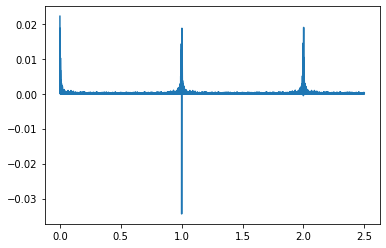

In [25]:
from astropy.timeseries import LombScargle
import gatspy

df=pd.read_csv('Metazygia monitor 1-test.csv', index_col=0)
dfdark=df.iloc[7200:]
dflight=df.iloc[:7200]
dfcos=dfdark.loc[:,['lights','Monitor 1 Spider 6']]
dfcos['test']='Spider'
dfcos['real']=dfdark['Monitor 1 Spider 6']
dfcos['y']=dfcos['real'].rolling(window=60).mean()
dfcos['x']=range(0,len(dfcos.real))
#dfcos=dfcos.drop(columns=['lights', 'Monitor 1 Spider 21'])
dfcos=dfcos.dropna()


time = range(len(dfcos.x))
move = dfcos['real'].values



lss = LombScargle(time, move)

freq, power = lss.autopower()
lss.false_alarm_probability(power.max()) 
plt.plot(frequency, power) 
import matplotlib.pyplot as plt  
 

dy = 0.1
ls = LombScargle(move, time, dy)


freq, power = ls.autopower()
ls.false_alarm_probability(power.max()) 
#lss.false_alarm_probability(power.max()) 

In [21]:
gatspy.fap()

NameError: name 'gatspy' is not defined